# ***Salary Estimation | K-neartest neighbour model***

>[Salary Estimation | K-neartest neighbour model](#scrollTo=wuenQUXbmXND)

>>[Splitting Dataset into Train & Test*](#scrollTo=9tqVGrzymwHE)

>>[Feature scaling](#scrollTo=HroI_S_blkr5)

>>[Finding the best K-value](#scrollTo=5szgP2cEj0Wk)

>>>[Calculating error for K values between 1 and 40](#scrollTo=4_3qcTVKRm9y)

>>>[Training](#scrollTo=8q80xBGLnaRt)

>>[Predicting whether new customer with age and salary will buy or not](#scrollTo=SJ_sgqjhny6w)

>>[Prediction for all test data](#scrollTo=Mc2SXpNTnHqq)

>>[Evaluating model - Confusion matrix](#scrollTo=laVtjBFeogUL)



Link for dataset:

https://drive.google.com/file/d/1TbObAIoyuQCBV0DBTd25nx4LNrcUmvcy/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Importing libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

***Load the dataset***

In [ ]:
# Loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/SML/Datasets/salary.csv')
dataset

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


In [ ]:
print(dataset.shape)

(32561, 5)


***Mapping Salary Data to Binary Value***

In [ ]:
income_set=set(dataset['income'])
dataset['income']=dataset['income'].map({'<=50K':0,'>50K':1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [ ]:
dataset

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
...,...,...,...,...,...
32556,22,10,0,40,0
32557,27,12,0,38,0
32558,40,9,0,40,1
32559,58,9,0,40,0


***Segregate datset into X and Y***

In [ ]:
X=dataset.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [ ]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

***Splitting the dataset for testing and training***

## ***Splitting Dataset into Train & Test****

Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced. Because of the nature of splitting the data in train and test is randomised you would get different data assigned to the train and test data unless you can control for the random factor.

For example, imagine you have numbers: 1,2,3,4,5 and you want to select two random numbers. Without using a random_state you would get different things: i.e. first 2,5 then 3,4 and so on.
When you control the random generator by setting the random state to 0, 1 or another number, everyone would get the same random numbers generated: i.e random_state=1 then the random numbers are 1,3 and everyone who will pick two random numbers using random_state=1 from 1,2,3,4,5 will get the same two numbers as you: 1,3.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

## ***Feature scaling***

we scale our data to make all the features contribute equally to the result

Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data

Transform - Transform method is transforming all the features using the respective mean and variance,

We want our test data to be a completely new and a surprise set for our model

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## ***Finding the best K-value***

In [ ]:
error=[]
from sklearn.neighbors import KNeighborsClassifier


### ***Calculating error for K values between 1 and 40***

0.235597592433362
0.19665888711460508
0.20157228841665642
0.18978012529173321
0.1943250214961307
0.18769192973836138
0.19113131064979733
0.18879744503132292
0.19039430045448963
0.1875690947058101
0.1883061049011178
0.1874462596732588
0.18781476477091266
0.18560373418498957
0.18855177496622036
0.1854808991524383
0.1883061049011178
0.18535806411988698
0.18634074438029727
0.18388404372927158
0.18720058960815625
0.18425254882692543
0.18560373418498957
0.1868320845105024
0.1881832698685665
0.18634074438029727
0.1874462596732588
0.18658641444539983
0.1883061049011178
0.18204151824100234
0.18560373418498957
0.18400687876182287
0.18351553863161774
0.1852352290873357
0.18535806411988698
0.18462105392457928
0.18584940425009214
0.18707775457560497
0.18634074438029727


Text(0, 0.5, 'Mean Error')

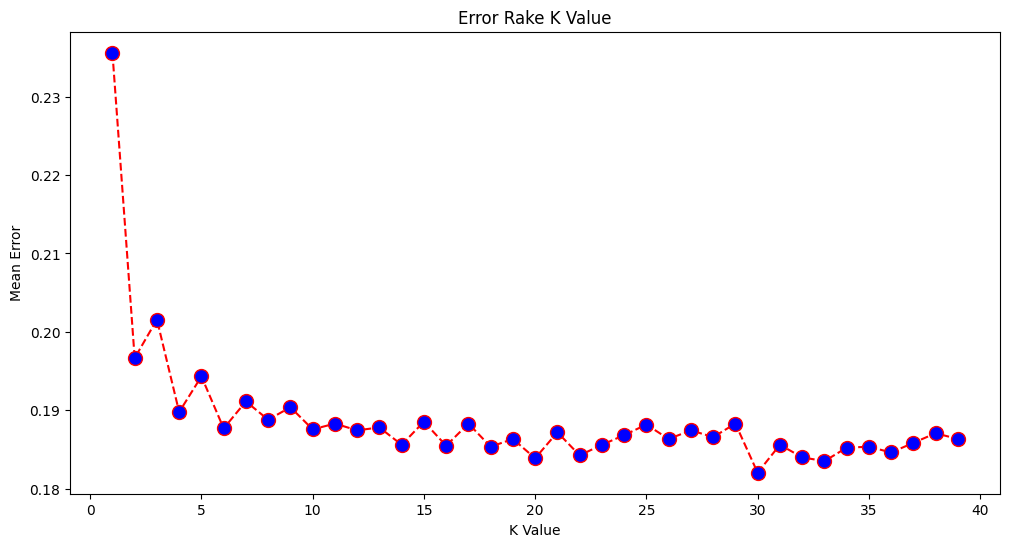

In [ ]:
for i in  range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  pred_i=model.predict(X_test)
  error.append(np.mean(pred_i!=y_test))
  print(np.mean(pred_i!=y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rake K Value')
plt.xlabel("K Value")
plt.ylabel("Mean Error")

### ***Training***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## ***Predicting whether new customer with age and salary will buy or not***

In [ ]:
age=int(input("Enter New Employee's age:"))
edu=int(input("Enter New Employee's education:"))
cg=int(input("enter the New Employee's capital gain:"))
wh=int(input("Enter New Employee's Hour's per week:"))
newEmp=[[age,edu,cg,wh]]
result=model.predict(sc.transform(newEmp))
print(result)

if result==1:
  print("Employee might got Salary above 50K")
else:
  print("Employee might not got Salary above 50K")

Enter New Employee's age:35
Enter New Employee's education:4
enter the New Employee's capital gain:1
Enter New Employee's Hour's per week:50
[0]
Employee might not got Salary above 50K


## ***Prediction for all test data***

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


## ***Evaluating model - Confusion matrix***

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy of the model:{0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix:
[[5585  608]
 [1033  915]]
Accuracy of the model:79.84277115833436%


The accuracy of the model is 79.84%